# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns

# Loading the Data

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
df['datetime'] = pd.to_datetime(df['date'], format = "%Y%m%d")

In [4]:
df = df.set_index('datetime')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
df = df.loc['2000':]
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2000-01-01,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [6]:
df = df.drop(columns=['date','cloud_cover','sunshine','global_radiation','pressure'])
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [7]:
df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

# Question 1

In [8]:
q1df = df['2000':'2010'].asfreq('M')
q1df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-31,10.7,11.5,10.3,0.0,0.0
2000-02-29,9.3,7.8,5.5,5.6,0.0
2000-03-31,11.8,7.5,5.0,0.0,0.0
2000-04-30,16.6,11.6,6.5,0.0,0.0
2000-05-31,16.8,12.6,6.3,1.4,0.0
...,...,...,...,...,...
2010-08-31,NaN,NaN,NaN,NaN,NaN
2010-09-30,16.6,11.7,6.9,1.8,NaN
2010-10-31,14.1,10.9,9.3,3.4,0.0


In [9]:
max_precipitation_date = q1df['precipitation'].idxmax()
max_precipitation_date

Timestamp('2002-04-30 00:00:00', freq='M')

In [10]:
q1df.loc[max_precipitation_date]

max_temp         15.3
mean_temp        10.1
min_temp          8.2
precipitation    13.8
snow_depth        0.0
Name: 2002-04-30 00:00:00, dtype: float64

In [11]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

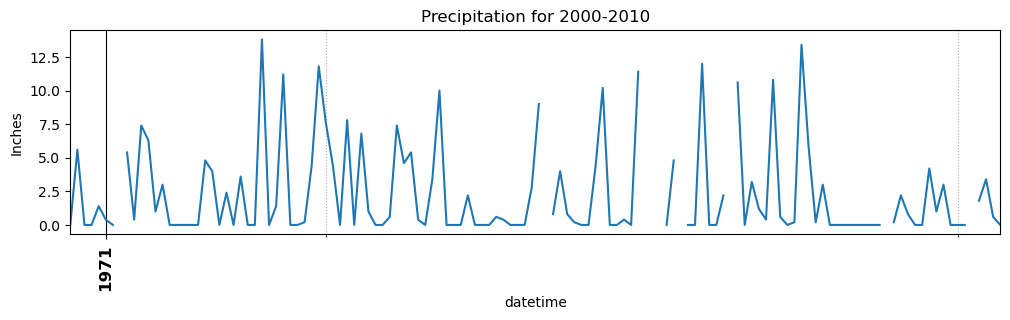

In [12]:
fig, ax = plt.subplots(figsize=(12,3))
q1df['precipitation'].plot(ax=ax,title='Precipitation for 2000-2010')
# xticks, xlabels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )
# ylabels
ax.set_ylabel('Inches')
# minor ticks
ax.xaxis.set_minor_locator(loc_3months)
# major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
# grid lines
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
# rotate major ticks
fig.autofmt_xdate(rotation=90,ha='center')

# Question 2

In [13]:
q2df = df.asfreq('Y')
q2df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-12-31,11.1,2.8,-4.6,6.3,0.0
2001-12-31,3.8,1.0,-1.9,0.0,0.0
2002-12-31,12.9,7.3,4.7,11.8,0.0
2003-12-31,8.0,3.3,0.9,4.6,0.0
2004-12-31,12.6,10.6,8.5,0.0,0.0
2005-12-31,8.8,5.4,1.9,0.2,0.0
2006-12-31,NaN,NaN,NaN,NaN,NaN
2007-12-31,8.5,6.7,4.9,0.0,0.0
2008-12-31,1.5,-0.8,-3.0,0.0,0.0


In [14]:
max_mean_temp = q2df['mean_temp'].idxmax()
max_mean_temp

Timestamp('2004-12-31 00:00:00', freq='A-DEC')

In [15]:
q2df.loc[max_mean_temp]

max_temp         12.6
mean_temp        10.6
min_temp          8.5
precipitation     0.0
snow_depth        0.0
Name: 2004-12-31 00:00:00, dtype: float64

In [16]:
## for major year ticks
loc_5years = mdates.YearLocator(5)

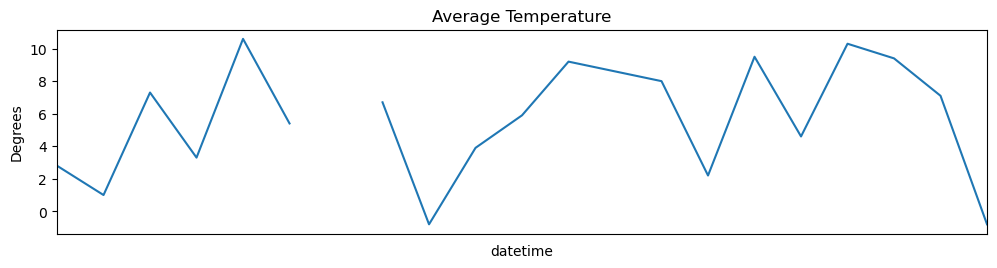

In [17]:
fig, ax = plt.subplots(figsize=(12,3))
q2df['mean_temp'].plot(ax=ax,title='Average Temperature')
# xticks, xlabels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )
# ylabels
ax.set_ylabel('Degrees')
# minor ticks
ax.xaxis.set_minor_locator(loc_year)
# major ticks
ax.xaxis.set_major_locator(loc_5years)
ax.xaxis.set_major_formatter(fmt_year)
# grid lines
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
# rotate major ticks
fig.autofmt_xdate(rotation=90,ha='center')